# Linear Regression Implementation from Scratch

This notebook implements Linear Regression from scratch using NumPy. We'll build the algorithm step by step and visualize the results.

## What is Linear Regression?
Linear regression is a fundamental algorithm in machine learning that models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.

The equation takes the form: y = wx + b
- y is the predicted value
- w is the weight (or coefficient)
- x is the feature value
- b is the bias (or intercept)

## Import Required Libraries

We'll need:
- NumPy for numerical computations
- Matplotlib for data visualization
- %matplotlib inline to display plots in the notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(0)

## Generate Sample Data

We'll create synthetic data with a known relationship:
- True relationship: y = 4 + 3x + noise
- x values are randomly generated between 0 and 2
- Gaussian noise is added to make it more realistic

This way, we can verify if our model learns the correct parameters (w ≈ 3 and b ≈ 4).

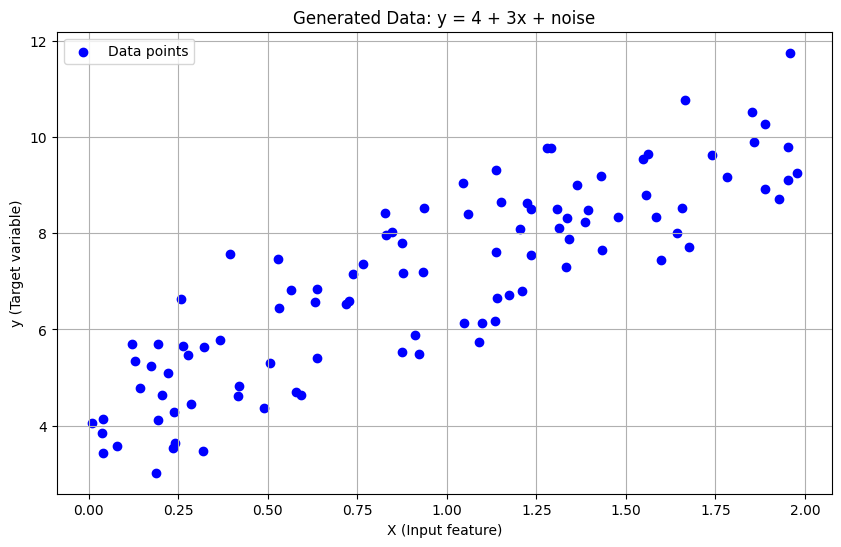

<Figure size 640x480 with 0 Axes>

In [2]:
# Generate random data points
X = 2 * np.random.rand(100, 1)  # 100 random x values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # True relationship with added noise

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X (Input feature)')
plt.ylabel('y (Target variable)')
plt.title('Generated Data: y = 4 + 3x + noise')
plt.legend()
plt.grid(True)
plt.show()
# how to save image as png
plt.savefig('images/generated_data.png', dpi=300)

## Linear Regression Class Implementation

Our implementation includes:
1. Initialization with hyperparameters
2. Gradient descent optimization
3. Mean Squared Error (MSE) loss function
4. Prediction method
5. Loss history tracking for visualization

### Key Concepts:
- **Gradient Descent**: Iteratively updates parameters to minimize the loss function
- **Learning Rate**: Controls how much we adjust parameters in each iteration
- **Loss Function**: Measures how well our predictions match the true values

In [3]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.history = {'loss': [], 'weights': [], 'bias': []}
    
    def fit(self, X, y):
        y = y.flatten()
        
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            # Calculate predictions
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute and store loss
            loss = self._compute_loss(y, y_predicted)
            self.history['loss'].append(loss)
            self.history['weights'].append(self.weights.copy())
            self.history['bias'].append(self.bias)

    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def _compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def plot_loss_history(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.history['loss'], label='Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss History')
        plt.legend()
        plt.grid(True)
        plt.show()
       
        plt.savefig('images/loss_history.png', dpi=300)

## Train the Model

Now we'll:
1. Create an instance of our LinearRegression class
2. Train it on our generated data
3. Visualize how the loss decreases during training

The decreasing loss indicates that our model is learning the underlying pattern in the data.

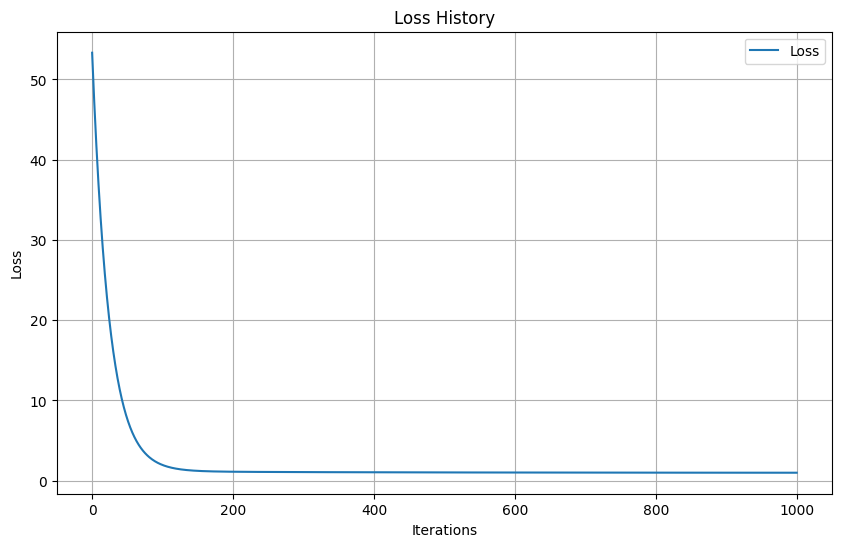

<Figure size 640x480 with 0 Axes>

In [4]:
# Create and train the model
model = LinearRegressionScratch(learning_rate=0.01, n_iterations=1000)
model.fit(X, y)

# Plot loss history
model.plot_loss_history()

## Evaluate and Visualize Results

Let's:
1. Make predictions on our data
2. Plot the original data points and our model's predictions
3. Compare the learned parameters with the true values

Remember, our true relationship was y = 4 + 3x + noise

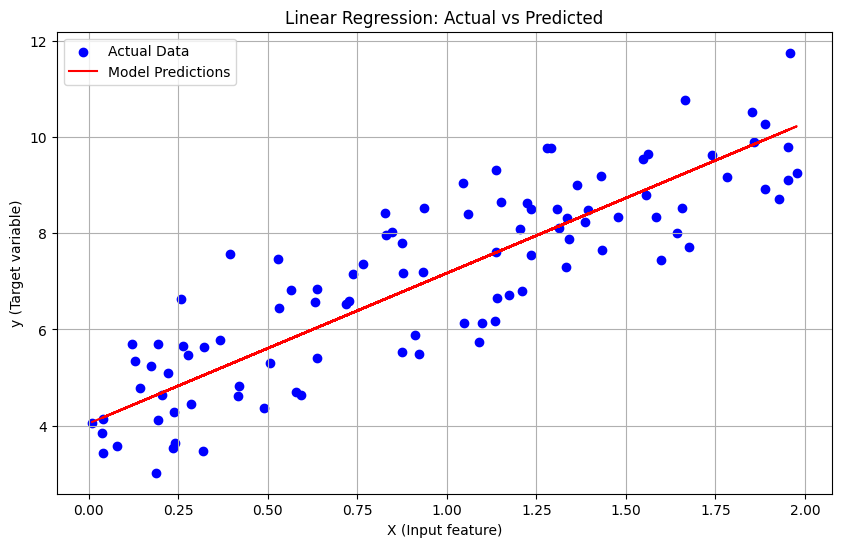

Model Parameters:
Weight (w): 3.1259 (True value: 3)
Bias (b): 4.0447 (True value: 4)

R² Score: -181.8522


In [5]:
# Make predictions
y_pred = model.predict(X)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Model Predictions')
plt.xlabel('X (Input feature)')
plt.ylabel('y (Target variable)')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Print model parameters
print("Model Parameters:")
print(f"Weight (w): {model.weights[0]:.4f} (True value: 3)")
print(f"Bias (b): {model.bias:.4f} (True value: 4)")

# Calculate and print R-squared score
y_mean = np.mean(y)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - y_mean)**2)
print(f"\nR² Score: {r2:.4f}")

## Conclusion

Our implementation successfully:
1. Learned the underlying relationship in the data
2. Found parameters close to the true values (w ≈ 3, b ≈ 4)
3. Made accurate predictions as shown by the visualization

This demonstrates how linear regression works from the ground up, including:
- Parameter initialization
- Gradient descent optimization
- Loss function computation
- Model prediction

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def create_learning_animation(X, y, model, n_frames=100):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(X.min(), X.max())
    ax.set_ylim(y.min() - 1, y.max() + 1)
    ax.scatter(X, y, color='blue', alpha=0.5)
    line, = ax.plot([], [], 'r-', lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        w = model.history['weights'][int(i * len(model.history['weights']) / n_frames)]
        b = model.history['bias'][int(i * len(model.history['bias']) / n_frames)]
        x = np.linspace(X.min(), X.max(), 100)
        y = w * x + b
        line.set_data(x, y)
        return line,

    anim = FuncAnimation(fig, animate, init_func=init, frames=n_frames, blit=True, interval=50)
    anim.save('./images/learning_process.gif', writer='pillow')
    plt.close(fig)

# Assuming you have X, y, and model objects defined
create_learning_animation(X, y, model)

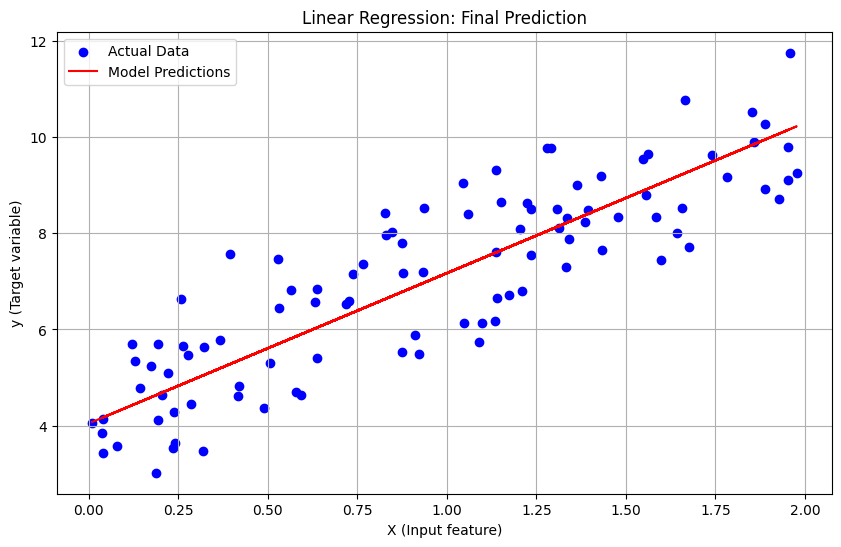

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(0)

# Generate random data points
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot final prediction
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Model Predictions')
plt.xlabel('X (Input feature)')
plt.ylabel('y (Target variable)')
plt.title('Linear Regression: Final Prediction')
plt.legend()
plt.grid(True)
plt.savefig('images/final_prediction.png', dpi=300)
plt.show()